# Selecting a performance measure

We are working on the bank dataset, which includes both categorical and numerical features. For that reason we need a custom error function, we combine the cross-entropy loss for categorical columns and RMSE for numerical columns, weighted by the ratio of the number of columns for each type. Our error function is: $$ E = w_{\text{cat}} \cdot CE + w_{\text{num}} \cdot RMSE $$
<br>
Where:
- $w_{\text{cat}} = \frac{n_{\text{cat}}}{n_{\text{cat}} + n_{\text{num}}}$
- $w_{\text{num}} = \frac{n_{\text{num}}}{n_{\text{cat}} + n_{\text{num}}}$
- $n_{\text{cat}} = \text{Number of categorical columns}$
- $n_{\text{num}} = \text{Number of numerical columns}$
<br>
And:
- $\text{RMSE} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2}$
- $\text{CE} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{i,k} \log(\hat{y}_{i,k})$
- $y_i = \text{True value for the } i\text{-th data point (numerical)}$
- $\hat{y}_i = \text{Imputed (predicted) value for the } i\text{-th data point (numerical)}$
- $N = \text{Number of missing values (numerical or categorical)}$
- $y_{i,k} = \text{One-hot encoded true value for the } i\text{-th data point and } k\text{-th class}$
- $\hat{y}_{i,k} = \text{Predicted probability for the } k\text{-th class for the } i\text{-th data point}$
- $K = \text{Number of classes for the categorical column.}$

# Download the data

In [607]:
import pandas as pd

bank_df = pd.read_csv("./data/bank-full.csv", sep=";")

# Take a quick look at the Data

In [608]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [609]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [610]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


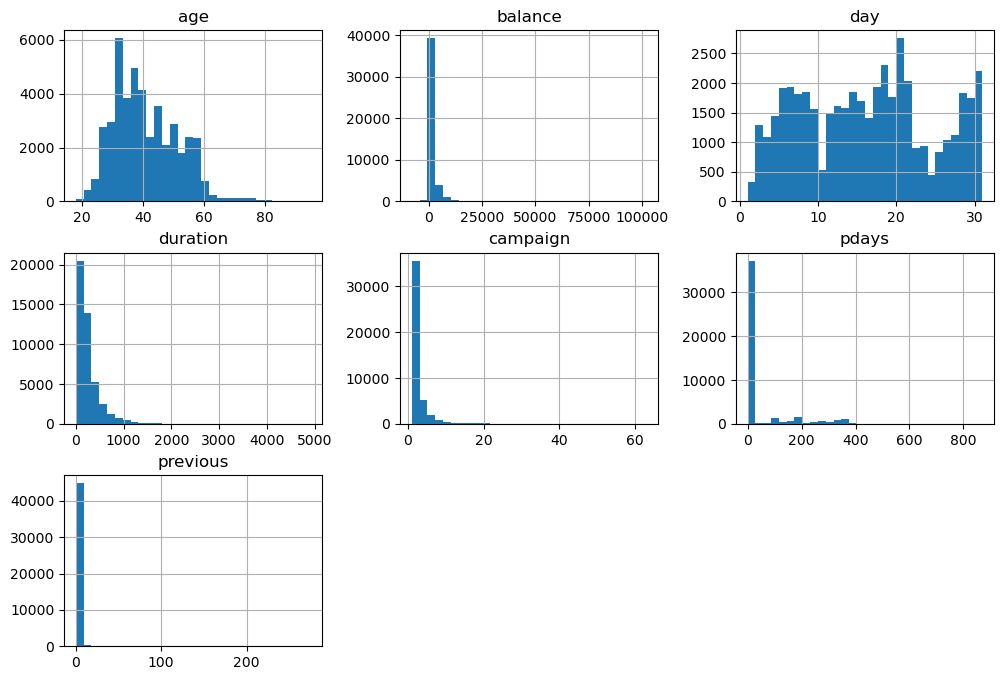

In [611]:
import matplotlib.pyplot as plt

bank_df.hist(bins=30, figsize=(12,8))
plt.show()

# Create a Test Set

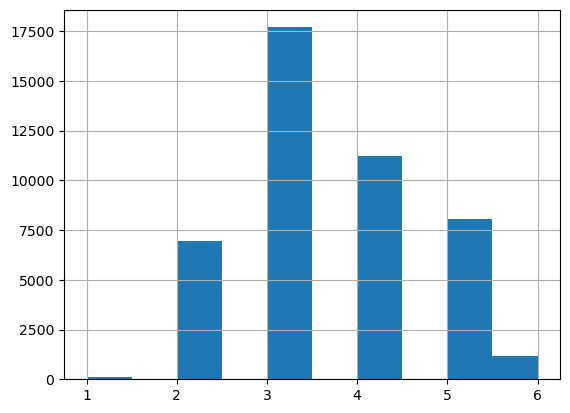

In [612]:
import numpy as np

bank_df["Age_cat"] = pd.cut(bank_df["age"],
                            bins=[10, 20, 30, 40, 50, 60, np.inf],
                            labels=[1, 2, 3, 4, 5, 6])

bank_df.Age_cat.hist(bins=10)
plt.show()

In [613]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bank_df, test_size=0.4, stratify=bank_df["Age_cat"], random_state=42)

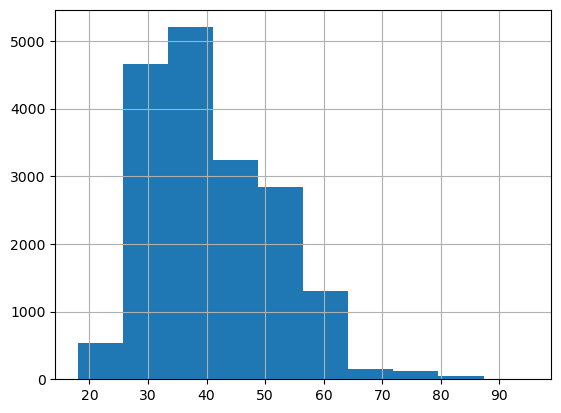

In [614]:
test_set["age"].hist()
plt.show()

In [615]:
# Drop Age_cat column because we won't use it again
for set_ in (train_set, test_set, bank_df):
    set_.drop(["Age_cat", "y"], axis=1, inplace=True)

In [616]:
train_set_clean = train_set.copy()

In [617]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27126 entries, 6944 to 25943
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        27126 non-null  int64 
 1   job        27126 non-null  object
 2   marital    27126 non-null  object
 3   education  27126 non-null  object
 4   default    27126 non-null  object
 5   balance    27126 non-null  int64 
 6   housing    27126 non-null  object
 7   loan       27126 non-null  object
 8   contact    27126 non-null  object
 9   day        27126 non-null  int64 
 10  month      27126 non-null  object
 11  duration   27126 non-null  int64 
 12  campaign   27126 non-null  int64 
 13  pdays      27126 non-null  int64 
 14  previous   27126 non-null  int64 
 15  poutcome   27126 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.5+ MB


# Prepare Data for ML algorithms

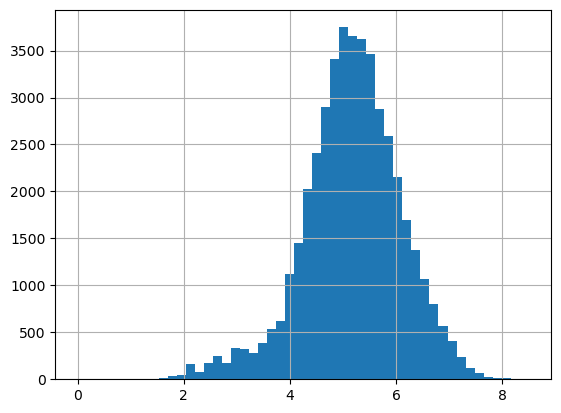

In [618]:
# normalize duration column using log transformation
import numpy as np
bank_df["duration"] = np.log(bank_df["duration"]+1)
bank_df["duration"].hist(bins=50)
plt.show()

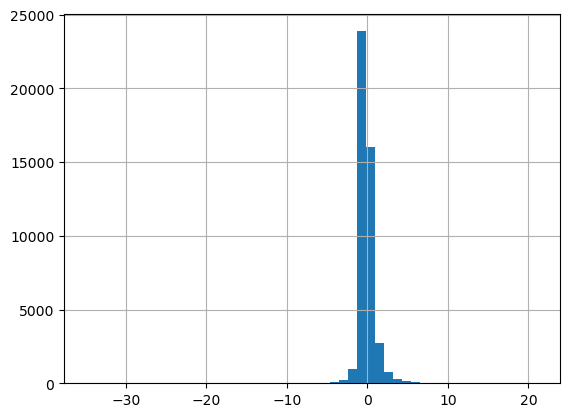

In [619]:
from sklearn.preprocessing import PowerTransformer

# normalize balance column using Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
bank_df['balance'] = pt.fit_transform(bank_df[['balance']])

# Plot the transformed balance column
bank_df['balance'].hist(bins=50)
plt.show()

In [620]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

numerical_cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]
nominal_cols = ["job", "marital", "default", "housing", "loan", "contact", "poutcome"]
ordinal_cols = ["education", "month"]

log_transformer = FunctionTransformer(lambda x: np.log1p(np.maximum(x, 0) + 1e-9), validate=True)
pt = FunctionTransformer(lambda x: PowerTransformer(method='yeo-johnson').fit_transform(x), validate=True)

nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('log_transform', log_transformer, ['duration']),
        ('pt', pt, ['balance']),
        ('scaler', StandardScaler(), ["age", "campaign", "pdays", "previous"]),
        ('ord', ordinal_transformer, ordinal_cols),
        ('nom', nominal_transformer, nominal_cols)
    ])

preprocessed_train_set = preprocessor.fit_transform(train_set)
pd.DataFrame(preprocessed_train_set).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27126 entries, 0 to 27125
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       27126 non-null  float64
 1   1       27126 non-null  float64
 2   2       27126 non-null  float64
 3   3       27126 non-null  float64
 4   4       27126 non-null  float64
 5   5       27126 non-null  float64
 6   6       27126 non-null  float64
 7   7       27126 non-null  float64
 8   8       27126 non-null  float64
 9   9       27126 non-null  float64
 10  10      27126 non-null  float64
 11  11      27126 non-null  float64
 12  12      27126 non-null  float64
 13  13      27126 non-null  float64
 14  14      27126 non-null  float64
 15  15      27126 non-null  float64
 16  16      27126 non-null  float64
 17  17      27126 non-null  float64
 18  18      27126 non-null  float64
 19  19      27126 non-null  float64
 20  20      27126 non-null  float64
 21  21      27126 non-null  float64
 22

In [621]:
from gain_utils import MCAR2unifo

preprocessed_train_set_missing = MCAR2unifo(preprocessed_train_set, 80)
preprocessed_train_set_missing

c:\Users\imoua\OneDrive\Bureau\bi\projet_BI\gain_utils.py:239: UserWarning: PATTERNS at risk of being all NaN: 92
  warnings.warn(f"PATTERNS at risk of being all NaN: {nPatternsRisk}")


array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan, -0.65180161, ...,         nan,
         0.        ,         nan],
       ...,
       [        nan,  0.55780456,         nan, ...,         nan,
         0.        ,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [622]:
# from gain_utils import missing_method

# preprocessed_train_set_missing, mask = missing_method(preprocessed_train_set, mechanism="mcar", method="random", missing_threshold=0.1, random_state=42)
# preprocessed_train_set_missing

In [623]:
from improved_gain import GAINImputer
data_x = preprocessed_train_set_missing.copy()
gain_parameters = {
    'batch_size': 4,
    'hint_rate': 0.9,
    'alpha': 1,
    'iterations': 5000,
    'initial_lr': 0.0001,
    'min_lr': 1e-6
}

gain_imputer = GAINImputer(gain_parameters=gain_parameters)
imputed_data = gain_imputer.fit_transform(data_x)

  0%|          | 5/5000 [00:02<32:19,  2.58it/s]  

Iteration 1/5000 - D_loss: 0.7142, G_loss: 1.4683, MSE_loss: 0.9301


 20%|██        | 1012/5000 [00:17<01:06, 59.81it/s]

Iteration 1001/5000 - D_loss: 0.5002, G_loss: 2.6460, MSE_loss: 1.4505


 40%|████      | 2012/5000 [00:33<00:39, 76.33it/s]

Iteration 2001/5000 - D_loss: 0.4427, G_loss: 1.2836, MSE_loss: 0.0962


 60%|██████    | 3014/5000 [00:46<00:21, 92.69it/s]

Iteration 3001/5000 - D_loss: 0.4225, G_loss: 4.9064, MSE_loss: 3.4941


 80%|████████  | 4013/5000 [00:58<00:12, 77.60it/s]

Iteration 4001/5000 - D_loss: 0.4378, G_loss: 1.4433, MSE_loss: 0.1860


100%|██████████| 5000/5000 [01:12<00:00, 69.11it/s]


In [624]:
from gain_utils import custom_imputation_error_onehot

mask = np.isnan(preprocessed_train_set_missing)

# Map original column types to processed indices
n_numerical = len(numerical_cols)
n_nominal = sum([len(train_set[col].unique()) for col in nominal_cols])  # One-hot encoding expands nominal columns
n_ordinal = len(ordinal_cols)

# Assign column ranges
numerical_indices = list(range(n_numerical))
ordinal_indices = list(range(n_numerical, n_numerical + n_ordinal))
nominal_indices = list(range(n_numerical + n_ordinal, n_numerical + n_ordinal + n_nominal))

# Build the onehot_indices dictionary
onehot_indices = {}
start = n_numerical + n_ordinal
for col in nominal_cols:
    n_classes = len(train_set[col].unique())
    onehot_indices[col] = list(range(start, start + n_classes))
    start += n_classes

# Define column types (categorical or numerical)
column_types = ['numerical'] * n_numerical + ['categorical'] * (n_nominal + n_ordinal)

# Calculate the error
error_metrics = custom_imputation_error_onehot(
    clean_data=preprocessed_train_set,
    imputed_data=imputed_data,
    missing_mask=mask,
    column_types=column_types,
    onehot_indices=onehot_indices
)

# Output results
print("Weighted Error:", error_metrics['weighted_error'])
print("Categorical Error (CE):", error_metrics['categorical_error'])
print("Numerical Error (RMSE):", error_metrics['numerical_error'])
print("Weights:", error_metrics['weights'])

Weighted Error: 0.5863673521122361
Categorical Error (CE): 0.23656074364177673
Numerical Error (RMSE): 2.335400394464533
Weights: {'categorical': 0.8333333333333334, 'numerical': 0.16666666666666666}


c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill re

In [625]:
preprocessed_test_set = preprocessor.transform(test_set)

In [626]:
preprocessed_test_set_missing = MCAR2unifo(preprocessed_test_set, 30)
mask_test = np.isnan(preprocessed_test_set_missing)

In [627]:
# preprocessed_test_set_missing, mask_test = missing_method(preprocessed_test_set, mechanism="mcar", method="random", missing_threshold=0.1, random_state=42)

In [628]:
imputed_test_set = gain_imputer.transform(preprocessed_test_set_missing)

In [629]:
# Calculate the error
error_metrics_test = custom_imputation_error_onehot(
    clean_data=preprocessed_test_set,
    imputed_data=imputed_test_set,
    missing_mask=mask_test,
    column_types=column_types,
    onehot_indices=onehot_indices
)

# Output results
print("Weighted Error:", error_metrics_test['weighted_error'])
print("Categorical Error (CE):", error_metrics_test['categorical_error'])
print("Numerical Error (RMSE):", error_metrics_test['numerical_error'])
print("Weights:", error_metrics_test['weights'])
print("azelhad")

Weighted Error: 0.44528511734241677
Categorical Error (CE): 0.1478641019195739
Numerical Error (RMSE): 1.9323901944566313
Weights: {'categorical': 0.8333333333333334, 'numerical': 0.16666666666666666}
azelhad


c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill re

In [646]:
import matplotlib.pyplot as plt

def plot_comparison(test_sizes, experiment, model1_rmse, model2_rmse, model3_rmse, model4_rmse, model1_label="Model 1", model2_label="Model 2", model3_label="Model 3", model4_label="Model 4"):
    """
    Plots RMSE values of four models for varying test sizes.

    Parameters:
    - test_sizes: List of test sizes (e.g., [0.1, 0.2, ..., 0.8]).
    - model1_rmse: List of RMSE values for the first model corresponding to test sizes.
    - model2_rmse: List of RMSE values for the second model.
    - model3_rmse: List of RMSE values for the third model.
    - model4_rmse: List of RMSE values for the fourth model.
    - model1_label: Label for the first model in the legend.
    - model2_label: Label for the second model in the legend.
    - model3_label: Label for the third model in the legend.
    - model4_label: Label for the fourth model in the legend.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(test_sizes, model1_rmse, marker='o', label=model1_label, linestyle='-')
    plt.plot(test_sizes, model2_rmse, marker='s', label=model2_label, linestyle='--')
    plt.plot(test_sizes, model3_rmse, marker='^', label=model3_label, linestyle=':')
    plt.plot(test_sizes, model4_rmse, marker='d', label=model4_label, linestyle='-.')
    
    plt.title(f"{experiment} Comparison of Models")
    plt.xlabel("Missingness Ratio of Train Set (%)")
    plt.ylabel("RMSE")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.xticks(test_sizes)
    plt.tight_layout()
    
    plt.show()


In [640]:
gan_test = {
    'weighted_error': [0.6581216576922833, 0.6404631431308873, 0.6774428729958071, 0.6467616365312843, 0.6426444922956799, 0.6470673758086196, 0.6445460779630237, 0.6880922565400884],
    'ce': [0.4031785325756269, 0.37592450315104114, 0.42759003289911857, 0.38211665685709195, 0.38487509418748295, 0.38508843628383527, 0.38900216779679525, 0.4192574465021579],
    'rmse': [1.9328372832755647, 1.963156343030118, 1.9267070734792497, 1.9699865349022454, 1.9314914828366645, 1.956962073432542, 1.9222656287941653, 2.032266306729741]
}

dae_test = {
    'weighted_error': [0.3356, 0.345, 0.3675, 0.5344 , 0.5542, 0.5542, 0.3742, 0.2444],
    'ce': [0.1991, 0.2295, 0.2418,0.1105,0.0647,0.0647,0.0382,0.1011],
    'rmse': [1.0179,0.9276,0.9957,2.6540,3.0019,3.0019,2.0544,0.9607]
}

iterative_test = {
    'weighted_error': [0.7033, 0.7154, 0.7204, 0.7040, 0.6793, 0.6803, 0.6685, 0.6822],
    'ce': [0.6428, 0.6477, 0.6465, 0.6487, 0.6078, 0.6090, 0.6105, 0.6064],
    'rmse': [1.0059, 1.0536, 1.0899, 0.9806, 1.0369, 1.0371, 0.9586, 1.0614]
}

knn_test = {
    'weighted_error': [0.5908703687447208,0.5345763056710134,0.5502050803653482,0.5693753006459943,0.5411623667526804,0.5650881394466628,0.5697711930156573,0.5706022846674229],
    'ce': [0.48176284438638634,0.4476923352166124,0.4542865457249378,0.47790074826718515,0.45125650639529497,0.48399575476626155,0.4837145578203585,0.4872305014480582],
    'rmse': [1.1364079905363929,0.9689961579430185,1.0297977535673999,1.0267480625400405,0.9906916685396069,0.9705500628486688,1.0000543689921508,0.9874612007642468]
}

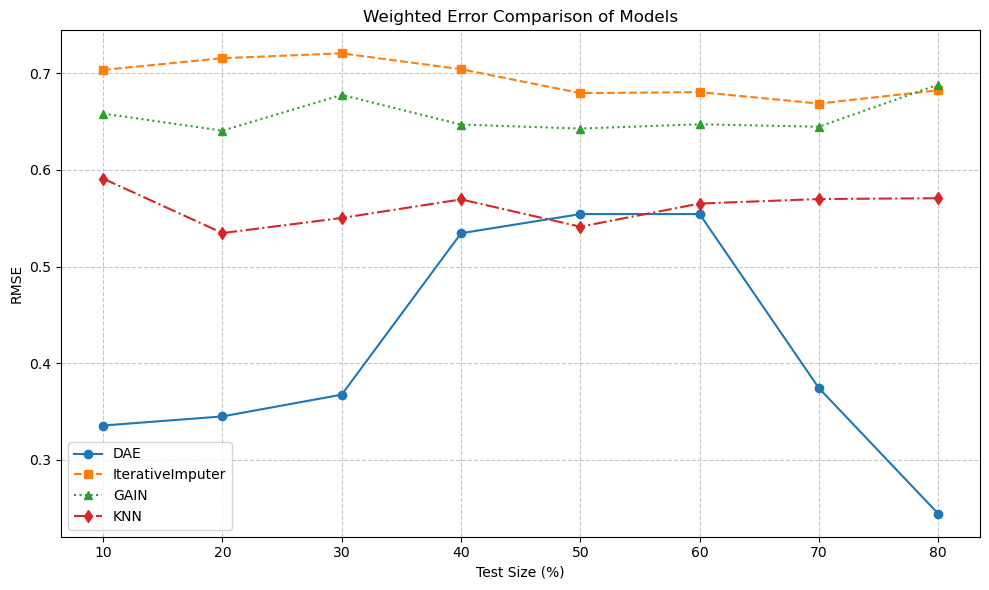

In [ ]:
test_sizes = [10, 20, 30, 40, 50, 60, 70, 80]
plot_comparison(test_sizes, "Weighted Error",dae_test['weighted_error'], iterative_test['weighted_error'], gan_test['weighted_error'], knn_test['weighted_error'], model1_label="DAE", model2_label="IterativeImputer", model3_label="GAIN", model4_label="KNN")

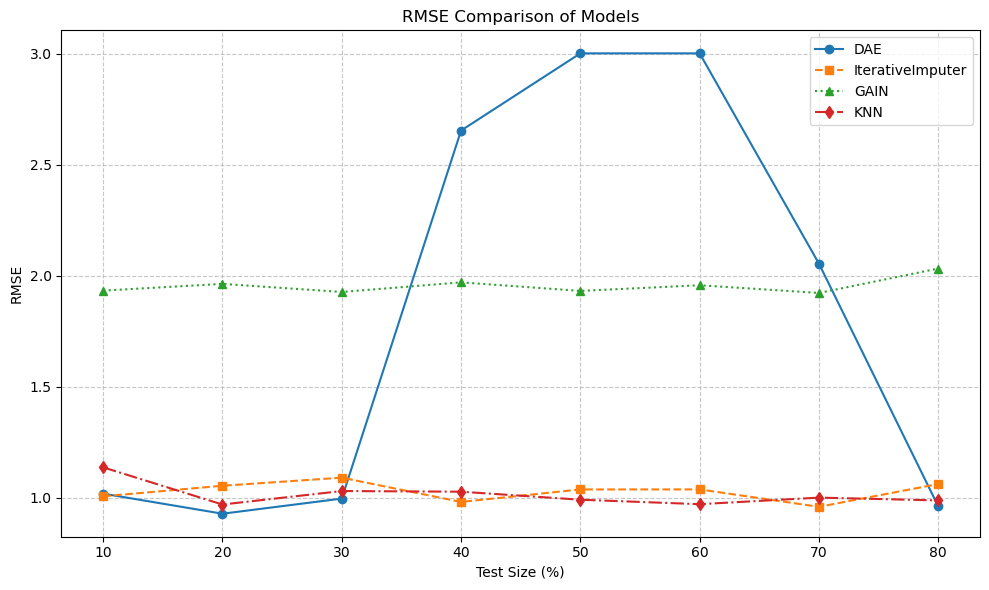

In [ ]:
plot_comparison(test_sizes, "RMSE",dae_test['rmse'], iterative_test['rmse'], gan_test['rmse'], knn_test['rmse'], model1_label="DAE", model2_label="IterativeImputer", model3_label="GAIN", model4_label="KNN")

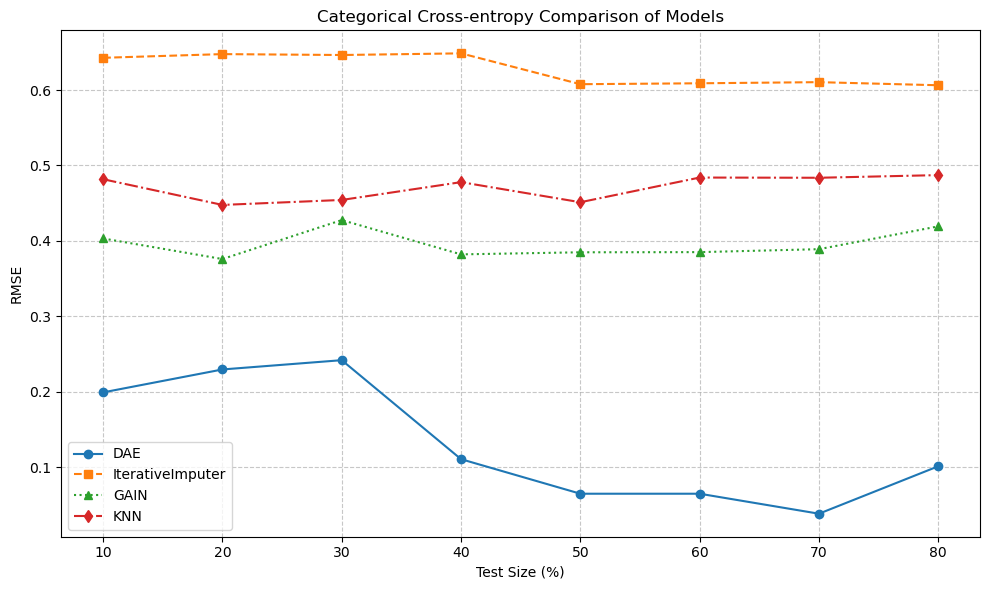

In [ ]:
plot_comparison(test_sizes, "Categorical Cross-entropy",dae_test['ce'], iterative_test['ce'], gan_test['ce'], knn_test['ce'], model1_label="DAE", model2_label="IterativeImputer", model3_label="GAIN", model4_label="KNN")

In [645]:
gan_miss = {
    'weighted_error': [0.6761553846237172, 0.6895227154034692, 0.6804647498379724, 0.691534417585374, 0.6859812120456563, 0.5923215705795463, 0.4422250245905491, 0.44528511734241677],
    'ce': [0.4189716820055933, 0.43843895168924235, 0.42507599445741345, 0.43788884681506884, 0.4350053940181441, 0.32221005781713447, 0.1425752010585938, 0.1478641019195739],
    'rmse': [1.9620738977143362, 1.9449415339746037, 1.9574085267407675, 1.9597622714369, 1.940860302183217, 1.9428791343916052, 1.9404741422503256, 1.9323901944566313]
}

dae_miss = {
    'weighted_error': [0.5306,0.5818,0.5969,0.6148,0.6360,0.6531,0.6531,0.6531],
    'ce': [0.1128,0.1286,0.1449,0.1638,0.1875,0.2065,0.2065,0.2065],
    'rmse': [2.6197,2.8482,2.8573,2.8699,2.8786,2.8861,2.8861,2.8861]
}

iterative_miss = {
    'weighted_error': [0.7006, 0.7187, 0.7084, 0.7092, 0.6970, 0.7207, 0.6957, 0.7119],
    'ce': [0.6431, 0.6645, 0.6531, 0.6539, 0.6397, 0.6653, 0.6373, 0.6551],
    'rmse': [0.9885, 0.9898, 0.9852, 0.9853, 0.9831, 0.9979, 0.9879, 0.9958]
}

knn_miss = {
    'weighted_error': [0.5476720102456605,0.5453250136028323,0.5388158986288798,0.5540052659533605,0.5414962364536546,0.5475298435264234,0.5510434676465906,0.563923771787481],
    'ce': [0.46082316035849763,0.46468997323134714,0.4522773081980434,0.4624887468447905,0.4594817518991387,0.4608353974621825,0.4695202700272306,0.4753428969716237],
    'rmse': [0.9819162596814751,0.9485002154602582,0.9715088507830618,1.0115878614962104,0.9515686592262339,0.9810020738476277,0.9586594557433906,1.0068281458667672]
}

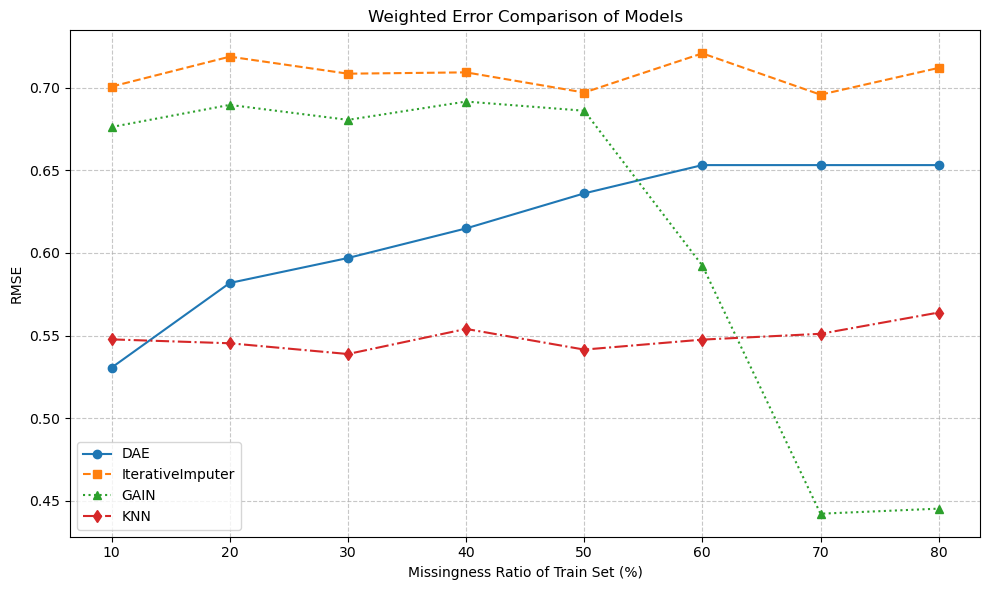

In [647]:
plot_comparison(test_sizes, "Weighted Error",dae_miss['weighted_error'], iterative_miss['weighted_error'], gan_miss['weighted_error'], knn_miss['weighted_error'], model1_label="DAE", model2_label="IterativeImputer", model3_label="GAIN", model4_label="KNN")

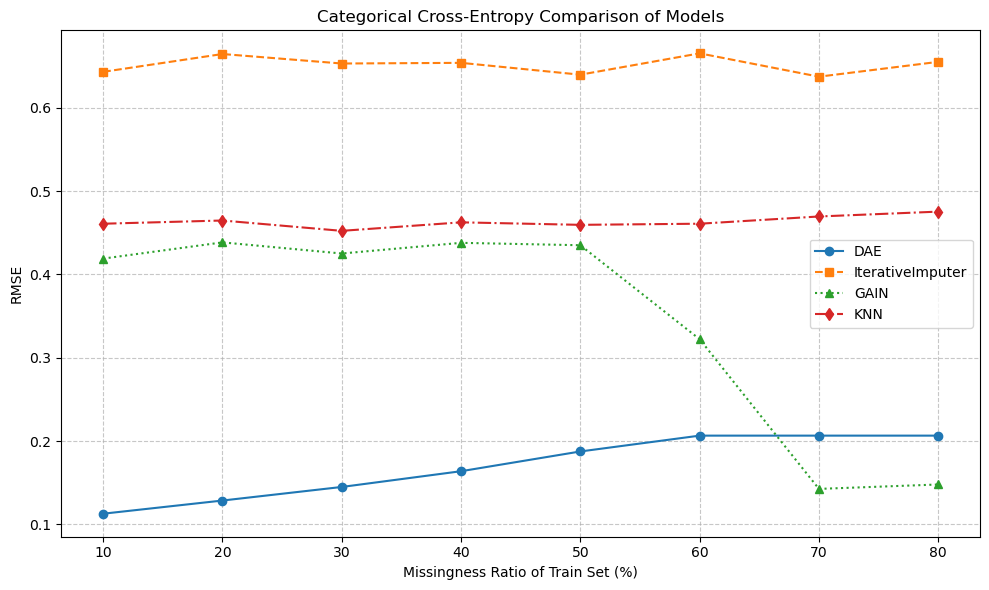

In [648]:
plot_comparison(test_sizes, "Categorical Cross-Entropy",dae_miss['ce'], iterative_miss['ce'], gan_miss['ce'], knn_miss['ce'], model1_label="DAE", model2_label="IterativeImputer", model3_label="GAIN", model4_label="KNN")

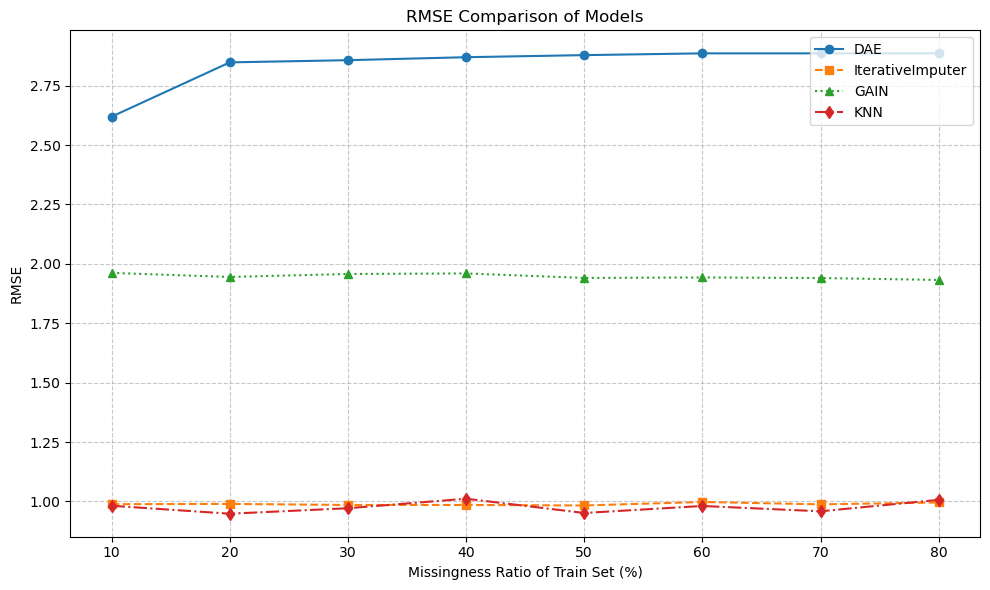

In [649]:
plot_comparison(test_sizes, "RMSE",dae_miss['rmse'], iterative_miss['rmse'], gan_miss['rmse'], knn_miss['rmse'], model1_label="DAE", model2_label="IterativeImputer", model3_label="GAIN", model4_label="KNN")